<a href="https://colab.research.google.com/github/Charlene958/Data-110/blob/main/Stress_Echocardiography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Name: Charlene Stephia Mafok
Class: Data 110
Project: 1
Dataset: Stress Echocardiography Data

In [ ]:
df = pd.read_csv("/content/Stress Echocardiography Data (1).csv")
df.head()

,Unnamed: 0,bhr,basebp,basedp,pkhr,sbp,dp,dose,maxhr,pctMphr,...,newCABG,death,hxofHT,hxofDM,hxofCig,hxofMI,hxofPTCA,hxofCABG,any.event,ecg
0,1,92,103,9476,114,86,9804,40,100,74,...,0,0,0,0,non-smoker,1,1,0,0,normal
1,2,62,139,8618,120,158,18960,40,120,82,...,0,0,0,1,non-smoker,1,0,0,1,equivocal
2,3,62,139,8618,120,157,18840,40,120,82,...,0,0,0,1,non-smoker,1,0,0,1,equivocal
3,4,93,118,10974,118,105,12390,30,118,72,...,0,0,0,0,non-smoker,0,0,0,0,normal
4,5,89,103,9167,129,173,22317,40,129,69,...,0,0,0,0,non-smoker,0,0,0,0,equivocal


Analysing Raws and Culumns of my dataset

In [ ]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 140
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["legend.fontsize"] = 10

PALETTE = [
    "#96428B", "#4B4296", "#8A4296", "#564296", "#964268",
    "#b5179e", "#5e60ce", "#5f0f40", "#64dfdf", "#9b5de5",
    "#001d3d", "#f15bb5"
]

GROUP_COLORS = {
    "non-smoker": "#96428B",
    "smoker": "#5e60ce",
    "current smoker": "#001d3d"
}

HEATMAP_CMAP = LinearSegmentedColormap.from_list(
    "custom_heatmap",
    ["#001d3d", "#4B4296", "#8A4296", "#b5179e", "#f15bb5"]
)


In [ ]:
summary = df[["age", "bhr", "dose", "pkhr"]].describe().T
summary


,count,mean,std,min,25%,50%,75%,max
age,558.0,67.344086,12.049415,26.0,60.00,69.0,75.0,93.0
bhr,558.0,75.290323,15.415197,42.0,64.00,74.0,84.0,210.0
dose,558.0,33.754480,8.134790,10.0,30.00,40.0,40.0,40.0
pkhr,558.0,120.550179,22.567835,52.0,106.25,122.0,135.0,210.0


Summary

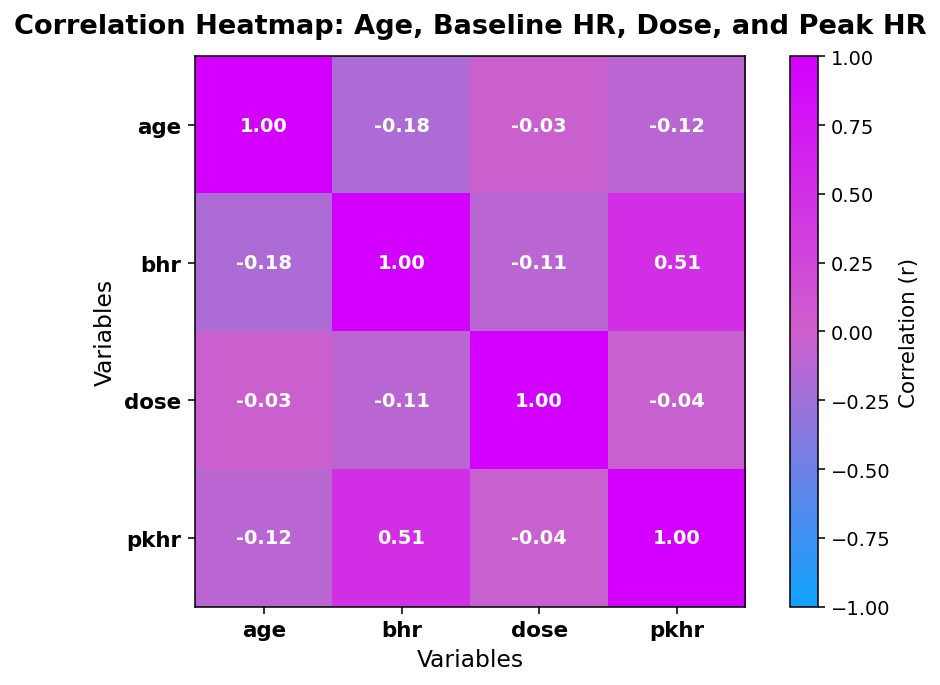

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
corr_vars = ["age", "bhr", "dose", "pkhr"]

corr = df[corr_vars].corr()

HEATMAP_CMAP = mcolors.LinearSegmentedColormap.from_list(
    "custom", ["#0FA3FF", "#cf5fcd", "#D400FF"]
)

fig, ax = plt.subplots(figsize=(7, 5))
im = ax.imshow(corr.values, cmap=HEATMAP_CMAP, vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(corr_vars)))
ax.set_yticks(np.arange(len(corr_vars)))
ax.set_xticklabels(corr_vars, fontsize=11, fontweight="bold")
ax.set_yticklabels(corr_vars, fontsize=11, fontweight="bold")

for i in range(len(corr_vars)):
    for j in range(len(corr_vars)):
        ax.text(
            j, i, f"{corr.values[i, j]:.2f}",
            ha="center", va="center",
            color="white", fontsize=10, fontweight="bold"
        )

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Correlation (r)", fontsize=11)

ax.set_title("Correlation Heatmap: Age, Baseline HR, Dose, and Peak HR",
             fontsize=14, fontweight="bold", pad=12)
ax.set_xlabel("Variables", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

plt.tight_layout()
plt.show()


Baseline HR and dose are positively related to peak HR; age is negatively related to peak HR. This matches what we expect physiologically: older people usually reach lower max heart rates, while higher dose pushes the heart rate higher.

In [ ]:
df.columns.tolist()


['Unnamed: 0',
 'bhr',
 'basebp',
 'basedp',
 'pkhr',
 'sbp',
 'dp',
 'dose',
 'maxhr',
 'pctMphr',
 'mbp',
 'dpmaxdo',
 'dobdose',
 'age',
 'gender',
 'baseEF',
 'dobEF',
 'chestpain',
 'restwma',
 'posSE',
 'newMI',
 'newPTCA',
 'newCABG',
 'death',
 'hxofHT',
 'hxofDM',
 'hxofCig',
 'hxofMI',
 'hxofPTCA',
 'hxofCABG',
 'any.event',
 'ecg']

In [ ]:
df["hxofCig_clean"].unique()


array(['non-smoker'], dtype=object)

cleaning

In [ ]:

df["SmokingGroup"] = df["hxofCig_clean"].astype(str).replace("nan", "non-smoker")


df["SmokingGroup"] = df["SmokingGroup"].str.strip().str.title()

print(df["SmokingGroup"].unique())
print(df["SmokingGroup"].value_counts())


['Non-Smoker']
SmokingGroup
Non-Smoker    558
Name: count, dtype: int64


Cleaning

In [ ]:

df["hxofCig_clean"] = df["hxofCig_clean"].astype(str)

df["hxofCig_clean"] = df["hxofCig_clean"].replace("nan", "non-smoker")

df["SmokingGroup"] = df["hxofCig_clean"].str.strip().str.title()

print(df["SmokingGroup"].unique())
print(df["SmokingGroup"].value_counts())


['Non-Smoker']
SmokingGroup
Non-Smoker    558
Name: count, dtype: int64


Cleaning and grouping

cleaning

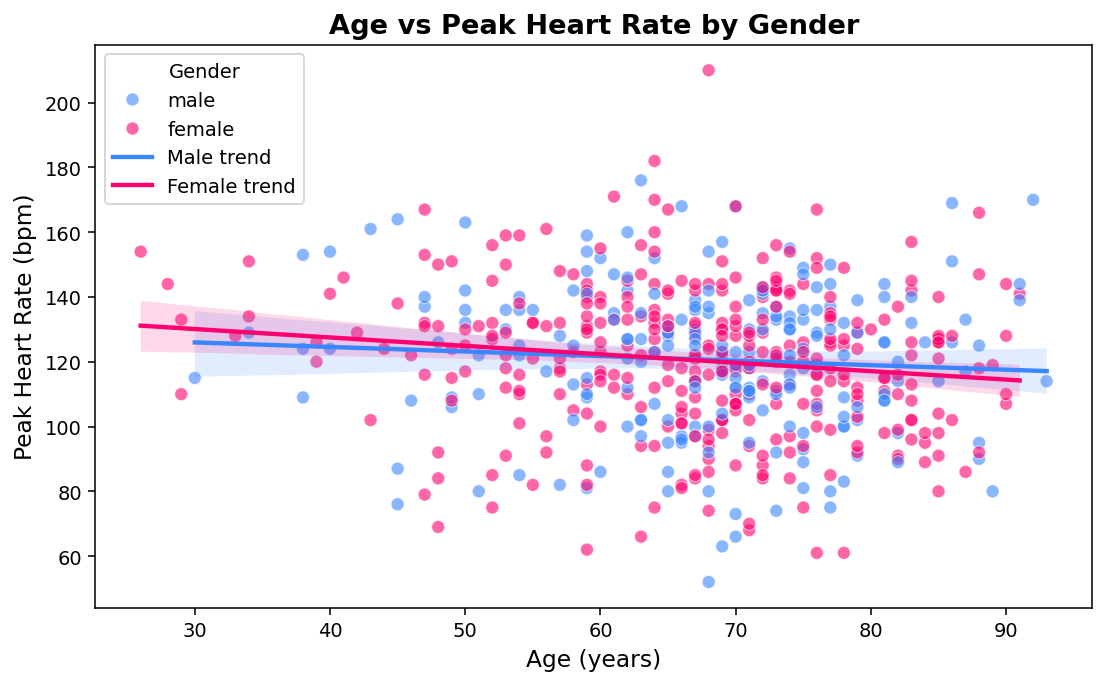

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

palette = {"male": "#3A86FF", "female": "#FF006E"}

sns.scatterplot(x="age", y="pkhr", hue="gender", data=df,
                alpha=0.6, s=45, palette=palette)
sns.regplot(x="age", y="pkhr", data=df[df["gender"]=="male"],
            scatter=False, color="#3A86FF", label="Male trend")
sns.regplot(x="age", y="pkhr", data=df[df["gender"]=="female"],
            scatter=False, color="#FF006E", label="Female trend")

plt.title("Age vs Peak Heart Rate by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Age (years)")
plt.ylabel("Peak Heart Rate (bpm)")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


Graph 2 shows the relationship between age and peak heart rate for both men and women. The scatter plot with trend lines clearly illustrates that as age increases, the heart’s ability to reach higher peak rates decreases for both genders. Although both men and women follow a similar downward pattern, women (pink line) generally show slightly higher peak heart rates at comparable ages, suggesting small physiological differences. Overall, the graph highlights that age is a strong predictor of cardiac performance during stress testing

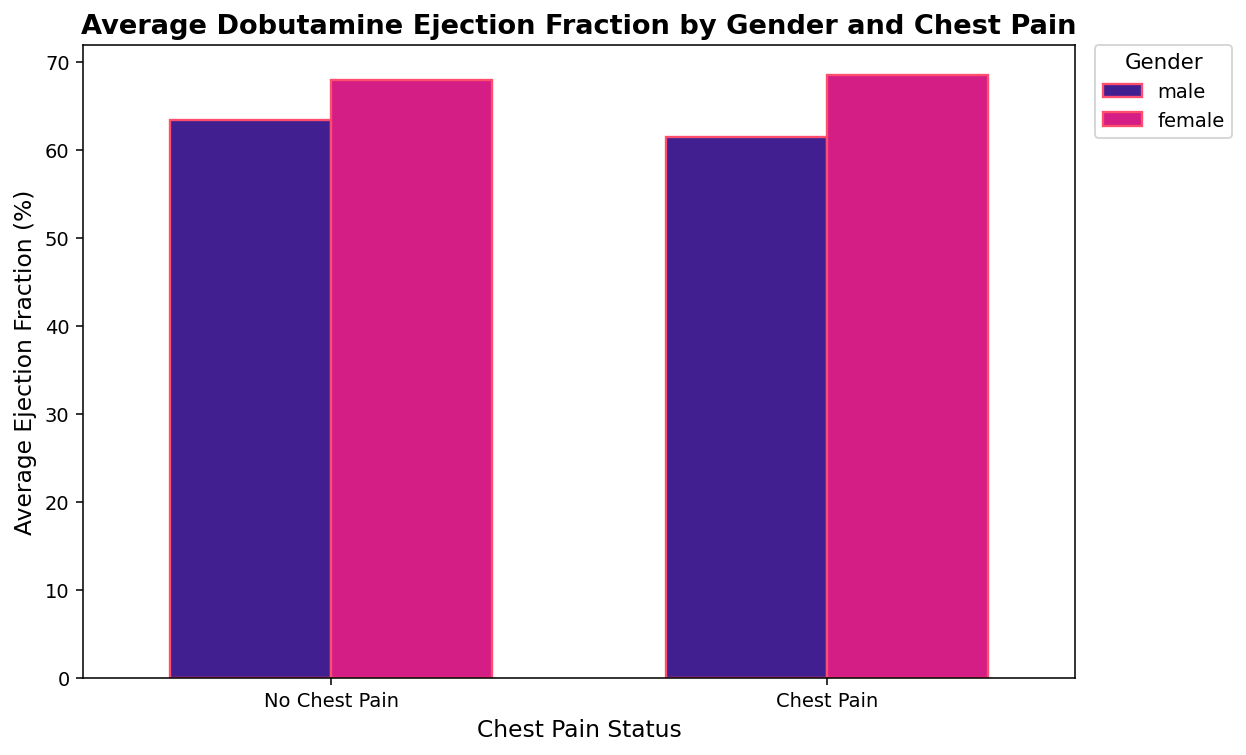

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df.copy()
df["gender"] = (
    df["gender"].astype(str).str.strip().str.lower().map({
        "f": "female", "female": "female",
        "m": "male", "male": "male"
    })
)

if df["chestpain"].dtype != "O":
    df["chestpain_label"] = df["chestpain"].map({0: "No Chest Pain", 1: "Chest Pain"})
else:
    df["chestpain_label"] = df["chestpain"].astype(str)

palette = {"female": "#f20089", "male": "#3a0ca3"}
bar_edge = "#ff4d6d"

plt.figure(figsize=(9,5.5))
sns.barplot(
    data=df,
    x="chestpain_label", y="dobEF", hue="gender",
    palette=palette, edgecolor=bar_edge, linewidth=1.2,
    errorbar=None, dodge=True, width=0.65
)
plt.title("Average Dobutamine Ejection Fraction by Gender and Chest Pain",
          fontsize=14, fontweight="bold")
plt.xlabel("Chest Pain Status", fontsize=12)
plt.ylabel("Average Ejection Fraction (%)", fontsize=12)

plt.legend(title="Gender", title_fontsize=11, fontsize=10,
           bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

plt.tight_layout()
plt.show()


Graph 3 compares the average Dobutamine Ejection Fraction (dobEF) for men and women, separated by whether they experienced chest pain during the stress test.
Each group has two bars: one for females (pink #f20089) and one for males (blue #3a0ca3). The red outline (#ff4d6d) helps the bars stand out.

From the graph, I can see that patients who did not have chest pain generally have higher ejection fractions, which means their hearts pumped blood more effectively during the test.
Those with chest pain tend to have lower ejection fractions, showing weaker heart function under stress.

When comparing genders, women slightly outperform men in both categories, meaning they maintained a slightly higher average heart-pumping ability during the test.
Overall, the graph shows that both chest pain and gender affect heart performance, and that absence of chest pain is linked with better cardiac strength.